(0, 0, 0, 0) 0.60+0.00j
(0, 0, 0, 1) -0.10+0.00j
(0, 0, 0, 2) -0.10+0.00j
(0, 0, 1, 0) -0.10+0.00j
(0, 0, 1, 1) 0.20+0.00j
(0, 0, 1, 2) 0.20+0.00j
(0, 0, 2, 0) -0.10+0.00j
(0, 0, 2, 1) 0.20+0.00j
(0, 0, 2, 2) 0.20+0.00j
(0, 1, 0, 0) -0.10+0.00j
(0, 1, 0, 1) -0.02+0.00j
(0, 1, 0, 2) -0.02+0.00j
(0, 1, 1, 0) -0.02+0.00j
(0, 1, 1, 1) 0.05+0.00j
(0, 1, 1, 2) 0.05+0.00j
(0, 1, 2, 0) -0.02+0.00j
(0, 1, 2, 1) 0.05+0.00j
(0, 1, 2, 2) 0.05+0.00j
(0, 2, 0, 0) -0.10+0.00j
(0, 2, 0, 1) -0.02+0.00j
(0, 2, 0, 2) -0.02+0.00j
(0, 2, 1, 0) -0.02+0.00j
(0, 2, 1, 1) 0.05+0.00j
(0, 2, 1, 2) 0.05+0.00j
(0, 2, 2, 0) -0.02+0.00j
(0, 2, 2, 1) 0.05+0.00j
(0, 2, 2, 2) 0.05+0.00j
(1, 0, 0, 0) -0.10+0.00j
(1, 0, 0, 1) -0.02+0.00j
(1, 0, 0, 2) -0.02+0.00j
(1, 0, 1, 0) -0.02+0.00j
(1, 0, 1, 1) 0.05+0.00j
(1, 0, 1, 2) 0.05+0.00j
(1, 0, 2, 0) -0.02+0.00j
(1, 0, 2, 1) 0.05+0.00j
(1, 0, 2, 2) 0.05+0.00j
(1, 1, 0, 0) 0.20+0.00j
(1, 1, 0, 1) 0.05+0.00j
(1, 1, 0, 2) 0.05+0.00j
(1, 1, 1, 0) 0.05+0.00j
(1, 1, 1, 1) -0.10+0.

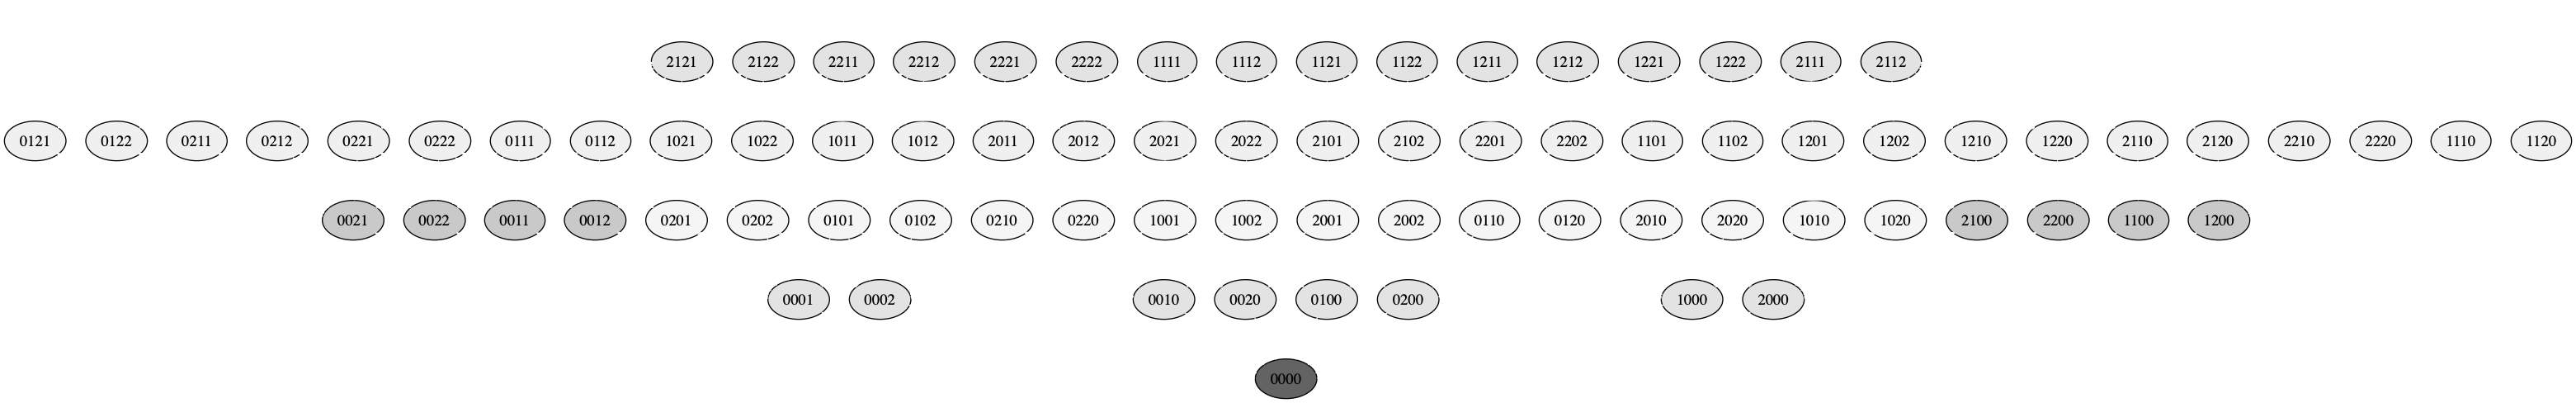

In [3]:
!apt install libgraphviz-dev
!pip install pygraphviz

from cmath import pi, rect
from itertools import combinations, product
import pygraphviz as pgv
from IPython.display import Image


n = 4


def lit(x, base=0):
    assert x in [0, 1, 2]
    return 1 if x == base else -1


def myxor(f, g):
    assert f in [-1, 1] and g in [-1, 1]
    return f * g

def myand(f, g):
    assert f in [-1, 1] and g in [-1, 1]
    return (1 + f + g - f * g) / 2


def f(x):
    assert all(t in [0, 1, 2] for t in x)
    return myand(myxor(lit(x[0]), lit(x[1])), myxor(lit(x[2]), lit(x[3])))  # (x0+x1)*(x2+x3)
    # return myxor(myand(lit(x[0]), lit(x[1])), myand(lit(x[2]), lit(x[3]))) # (x0*x1)+(x2*x3)
    # return 1 if sum(x) % 3 == 0 else -1 # mod3
    # return prod([(1 if t == 0 else -1) for t in x]) # xor



def dot(x, v):
    assert all(t in [0, 1, 2] for t in x) and all(t in [0, 1, 2] for t in v) and len(x) == len(v)
    return sum([x[i] * v[i] for i in range(len(x))]) % 3


def fourier_coefficient(v):
    return sum(f(x) * rect(1, 2 * pi * dot(x, v) / 3) for x in product([0, 1, 2], repeat=len(v))) / 3 ** len(v)


coefficients = dict()
for v in product([0, 1, 2], repeat=n):
    coefficients[v] = fourier_coefficient(v)
    if abs(coefficients[v]) > 0.00001:
        print(f'{v} {fourier_coefficient(v):.2f}')

strings = [''.join(a) for a in product('012', repeat=n)]

graph = pgv.AGraph(directed=True, rankdir='BT')
for s1, s2 in combinations(strings, 2):
    diff = [i for i in range(n) if s1[i] != s2[i] and (s1[i] == '0' or s2[i] == '0')]
    if len(diff) == 1:
        i = diff[0]
        if s1[i] != '0':
            graph.add_edge(s2, s1)
            graph.get_edge(s2, s1).attr['color'] = 'white'
        else:
            graph.add_edge(s1, s2)
            graph.get_edge(s1, s2).attr['color'] = 'white'

for v in graph.nodes():
    graph.get_node(v).attr['style'] = 'filled'
    int_v = tuple([int(s) for s in v])
    coef = coefficients[int_v]
    graph.get_node(v).attr['fillcolor'] = 'grey' + str(int((1 - abs(coef)) * 99))

graph.layout(prog='dot')
graph.draw('fourier_coefficients.png')
Image('fourier_coefficients.png')